In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [8]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
    inputs = []
    labels = []
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i == 0.5:
            continue
            
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
        
    return np.array(inputs), np.array(labels).reshape(21, 1)

def show_result(x, y, pred_y):
    fig, axs = plt.subplots(1, 2)
    
    axs[0].set_title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            axs[0].plot(x[i][0], x[i][1], 'ro')
        else:
            axs[0].plot(x[i][0], x[i][1], 'bo')
    
    axs[1].set_title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            axs[1].plot(x[i][0], x[i][1], 'ro')
        else:
            axs[1].plot(x[i][0], x[i][1], 'bo')
    
    fig.set_figwidth(10)
    plt.show()
    
def sigmoid(x):
    global wo_activation
    if wo_activation and not(len(x.shape) == 2 and x.shape[1] == 1):
        return x
    else:
        return 1.0/(1.0 + np.exp(-x) + 1e-15)

def derivative_sigmoid(x):
    global wo_activation
    if wo_activation and not(len(x.shape) == 2 and x.shape[1] == 1):
        return 1
    else:
        return np.multiply(x, 1.0 - x)

In [3]:
def init_weight(neuron_num):
    param = list()
    param.append(np.random.rand(2, neuron_num) - 0.5)
    param.append(np.random.rand(neuron_num, neuron_num) - 0.5)
    param.append(np.random.rand(neuron_num, 1) - 0.5)
    return param

def init_param(data_len, neuron_num):
    param = list()
    param.append(np.random.rand(data_len, 2))
    param.append(np.random.rand(data_len, neuron_num))
    param.append(np.random.rand(data_len, neuron_num))
    param.append(np.random.rand(data_len, 1))
    return param

class network:
    def __init__(self, neuron_num):
        self.neuron_num = neuron_num
        self.weight = init_weight(self.neuron_num)
        self.losses = list()
    
    def fit(self, x, y, epoch_num=30, lr=1e-4, show_freq=100):
        self.losses = list( )
        eps = 1e-15
        for epoch in range(epoch_num):
            forward = init_param(len(x), self.neuron_num)
            backward = init_param(len(x), self.neuron_num)

            forward[0] = x
            forward[1] = np.matmul(forward[0], self.weight[0])
            forward[2] = np.matmul(sigmoid(forward[1]), self.weight[1])
            forward[3] = np.matmul(sigmoid(forward[2]), self.weight[2])

            z = forward[3]
            backward[3] = -(derivative_sigmoid(sigmoid(z)) * (y / (sigmoid(z) + eps) + (y-1) / (1 - sigmoid(z) + eps)))
            backward[2] = derivative_sigmoid(sigmoid(forward[2])) * np.matmul(backward[3], self.weight[2].T)
            backward[1] = derivative_sigmoid(sigmoid(forward[1])) * np.matmul(backward[2], self.weight[1].T)
            backward[0] = derivative_sigmoid(sigmoid(forward[0])) * np.matmul(backward[1], self.weight[0].T)

            gradient = init_weight(self.neuron_num)
            for i in range(3):
                for f, b in zip(forward[i], backward[i+1]):
                    gradient[i] += np.outer(sigmoid(f), b)

            for i in range(3):
                self.weight[i] -= lr*gradient[i]
            
            y_pred = self.predict(x)
            loss = self.loss(y, y_pred)
            self.losses.append(loss)
            
            if epoch%show_freq == 0:
                print(f'epoch {epoch} loss : {loss}')
        
    def predict(self, x):
        ans = init_param(len(x), self.neuron_num)
        ans[0] = x
        ans[1] = sigmoid(np.matmul(ans[0], self.weight[0]))
        ans[2] = sigmoid(np.matmul(ans[1], self.weight[1]))
        ans[3] = sigmoid(np.matmul(ans[2], self.weight[2]))
        return np.array(ans[3])
    
    def loss(self, y, y_pred):
        y = y.reshape(len(y))
        y_pred = y_pred.reshape(len(y))
        loss = 0
        eps = 1e-15
        for i in range(len(y)):
            loss -= y[i] * np.log(y_pred[i] + eps) + (1-y[i]) * np.log(1 - y_pred[i] + eps)
        return loss
    
    def show_loss_curve(self):
        plt.figure()
        plt.plot(self.losses)
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()

epoch 0 loss : 70.58600216136992
epoch 100 loss : 68.61007624217973
epoch 200 loss : 65.2441223263655
epoch 300 loss : 34.80123757463705
epoch 400 loss : 14.978901798886492
epoch 500 loss : 9.824543092250726
epoch 600 loss : 7.540014544772961
epoch 700 loss : 6.143723310694644
epoch 800 loss : 5.364604143673766
epoch 900 loss : 4.6866120937197335
epoch 1000 loss : 4.156983030784487
epoch 1100 loss : 3.784982788690621
epoch 1200 loss : 3.4291768005685817
epoch 1300 loss : 3.171368721944975
epoch 1400 loss : 2.937601891714898
epoch 1500 loss : 2.7433728287998025
epoch 1600 loss : 2.5686502079354887
epoch 1700 loss : 2.4154276021584544
epoch 1800 loss : 2.2883699540223006
epoch 1900 loss : 2.1765314959052797
epoch 2000 loss : 2.0179157044232805
epoch 2100 loss : 1.9015795226089922
epoch 2200 loss : 1.8478357622072716
epoch 2300 loss : 1.7681210616414123
epoch 2400 loss : 1.6999090986334096
epoch 2500 loss : 1.6377328612455515
epoch 2600 loss : 1.5787960801559744
epoch 2700 loss : 1.532177

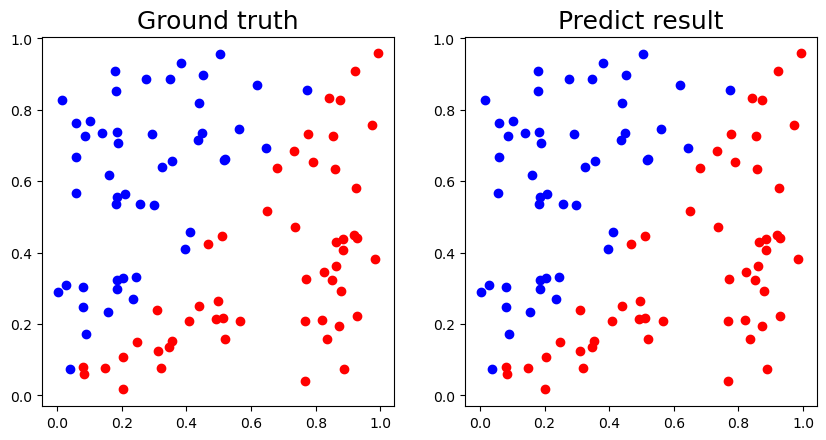

accuracy: 100.0%


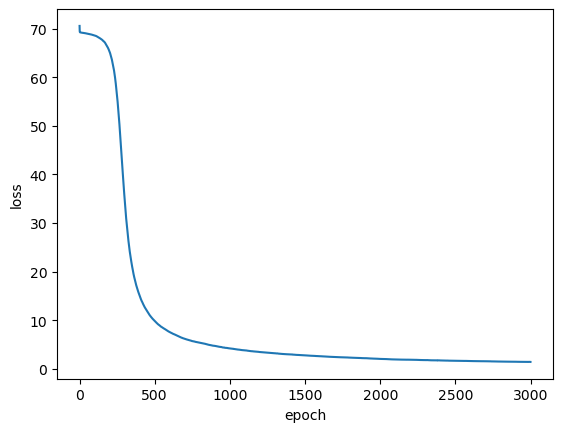

In [9]:
global wo_activation
wo_activation = False

x, y = generate_linear(n=100)

model = network(neuron_num=10)
model.fit(x, y, epoch_num=3000, lr=1e-2, show_freq=100)

y_pred = model.predict(x)
print(y_pred.round(2))

y_pred = [0 if i < 0.5 else 1 for i in y_pred]
show_result(x, y, y_pred)
print(f'accuracy: {accuracy_score(y, y_pred)*100}%')

model.show_loss_curve()

epoch 0 loss : 43.22685643716114
epoch 100 loss : 14.520440247779298
epoch 200 loss : 14.846273451028692
epoch 300 loss : 14.499328011978676
epoch 400 loss : 14.506216677356695
epoch 500 loss : 14.51013245492356
epoch 600 loss : 14.450294626720176
epoch 700 loss : 14.449879400906235
epoch 800 loss : 14.510853430323738
epoch 900 loss : 14.362672660686467
epoch 1000 loss : 14.20635746893159
epoch 1100 loss : 13.992488863243322
epoch 1200 loss : 13.925019110518754
epoch 1300 loss : 13.11345749167452
epoch 1400 loss : 11.859797888228309
epoch 1500 loss : 8.931046559318284
epoch 1600 loss : 7.268490620276208
epoch 1700 loss : 5.897430915185984
epoch 1800 loss : 5.032999336479512
epoch 1900 loss : 4.237408220473651
epoch 2000 loss : 3.4202231483671914
epoch 2100 loss : 2.894194684810062
epoch 2200 loss : 2.361953586856895
epoch 2300 loss : 1.9180516559987815
epoch 2400 loss : 1.5967294597509305
epoch 2500 loss : 1.3499854508120304
epoch 2600 loss : 1.1211618596207178
epoch 2700 loss : 0.9421

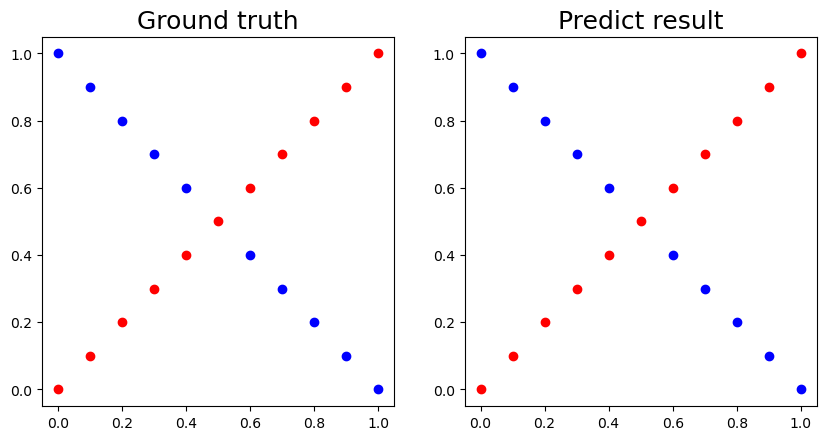

accuracy: 100.0%


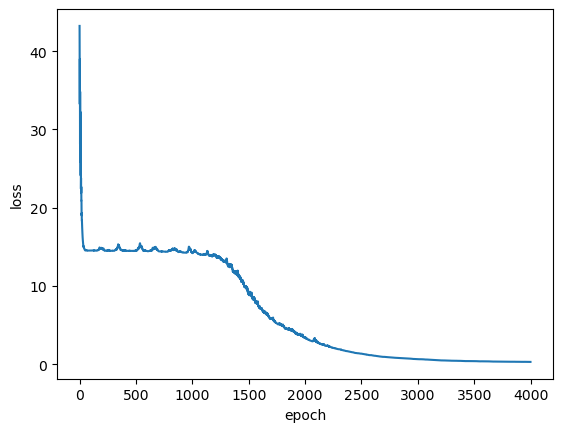

In [10]:
global wo_activation
wo_activation = False

x, y = generate_XOR_easy()

model = network(neuron_num=100)
model.fit(x, y, epoch_num=4000, lr=2e-2, show_freq=100)

y_pred = model.predict(x)
print(y_pred.round(2))

y_pred = [0 if i < 0.5 else 1 for i in y_pred]
show_result(x, y, y_pred)
print(f'accuracy: {accuracy_score(y, y_pred)*100}%')

model.show_loss_curve()

epoch 0 loss : 72.48217102901269
epoch 100 loss : 33.41181637707124
epoch 200 loss : 17.0217450131005
epoch 300 loss : 12.013099303596194
epoch 400 loss : 9.525385397739251
epoch 500 loss : 8.052980345932973
epoch 600 loss : 7.0928142835157475
epoch 700 loss : 6.399757480330971
epoch 800 loss : 5.882980841677272
epoch 900 loss : 5.472317873659584
epoch 1000 loss : 5.133115008069311
epoch 1100 loss : 4.8535368369605045
epoch 1200 loss : 4.608818020313077
epoch 1300 loss : 4.391945821004316
epoch 1400 loss : 4.201242528193382
epoch 1500 loss : 4.034392331304753
epoch 1600 loss : 3.883540147948035
epoch 1700 loss : 3.7387093687310773
epoch 1800 loss : 3.608319325257771
epoch 1900 loss : 3.4888831199709656
epoch 2000 loss : 3.3792431887129535
epoch 2100 loss : 3.2720981661870088
epoch 2200 loss : 3.1785893298888803
epoch 2300 loss : 3.0855119499368326
epoch 2400 loss : 3.0013368273280485
epoch 2500 loss : 2.9219371526516746
epoch 2600 loss : 2.8435261732578185
epoch 2700 loss : 2.772015513

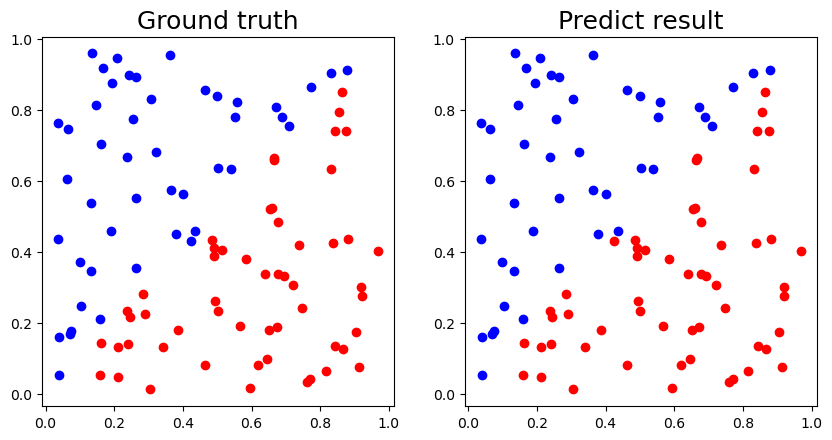

accuracy: 99.0%


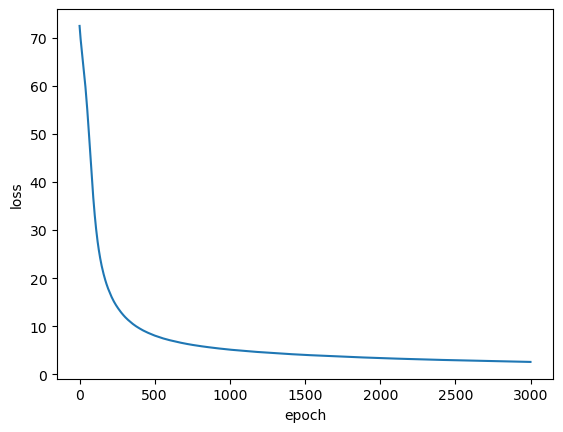

In [6]:
global wo_activation
wo_activation = True

x, y = generate_linear(n=100)

model = network(neuron_num=10)
model.fit(x, y, epoch_num=3000, lr=1e-3, show_freq=100)

y_pred = model.predict(x)
print(y_pred.round(2))

y_pred = [0 if i < 0.5 else 1 for i in y_pred]
show_result(x, y, y_pred)
print(f'accuracy: {accuracy_score(y, y_pred)*100}%')

model.show_loss_curve()

epoch 0 loss : 40.399797795429414
epoch 500 loss : 14.580477441335336
epoch 1000 loss : 14.654505970669584
epoch 1500 loss : 14.629103264452217
epoch 2000 loss : 14.56701410567739
epoch 2500 loss : 14.549847329378
epoch 3000 loss : 14.5475870854223
epoch 3500 loss : 14.60432702826233
epoch 4000 loss : 14.702095801957972
epoch 4500 loss : 15.064012445240376
epoch 5000 loss : 14.569689891391697
epoch 5500 loss : 14.610980740717602
epoch 6000 loss : 14.690396162359903
epoch 6500 loss : 14.650878642479821
epoch 7000 loss : 14.618973511876078
epoch 7500 loss : 14.54751761832692
epoch 8000 loss : 14.604428314357202
epoch 8500 loss : 14.56733842814523
epoch 9000 loss : 14.656043984419325
epoch 9500 loss : 14.563525648511398
epoch 10000 loss : 14.614633396564834
epoch 10500 loss : 14.554275508107354
epoch 11000 loss : 14.62769463199442
epoch 11500 loss : 14.605769632056493
epoch 12000 loss : 14.53821195339696
epoch 12500 loss : 14.787518266463842
epoch 13000 loss : 14.640294901108506
epoch 135

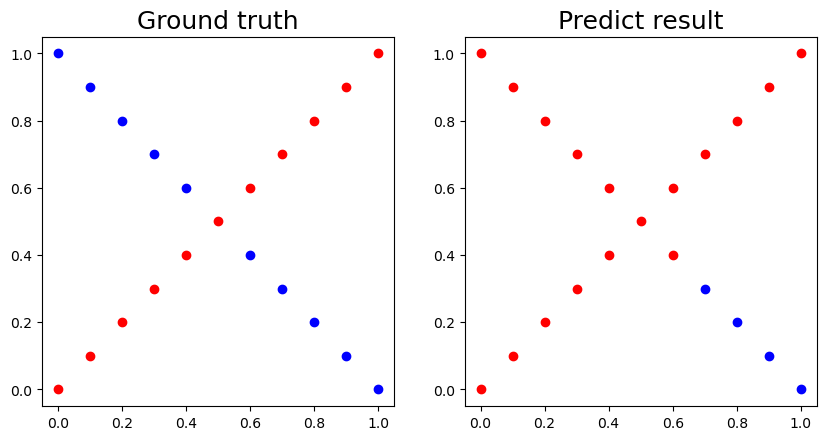

accuracy: 71.42857142857143%


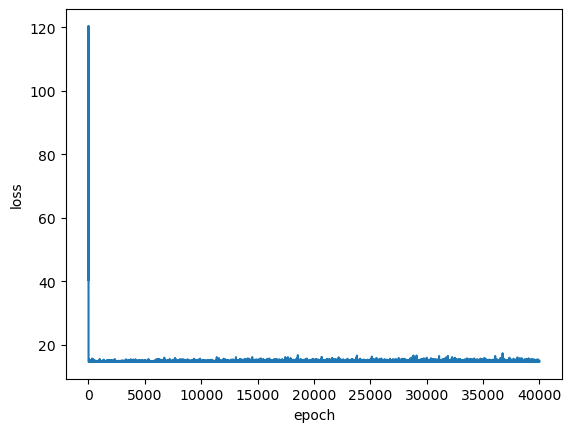

In [82]:
global wo_activation
wo_activation = True

x, y = generate_XOR_easy()

model = network(neuron_num=100)
model.fit(x, y, epoch_num=40000, lr=2e-2, show_freq=500)

y_pred = model.predict(x)
print(y_pred.round(2))

y_pred = [0 if i < 0.5 else 1 for i in y_pred]
show_result(x, y, y_pred)
print(f'accuracy: {accuracy_score(y, y_pred)*100}%')

model.show_loss_curve()